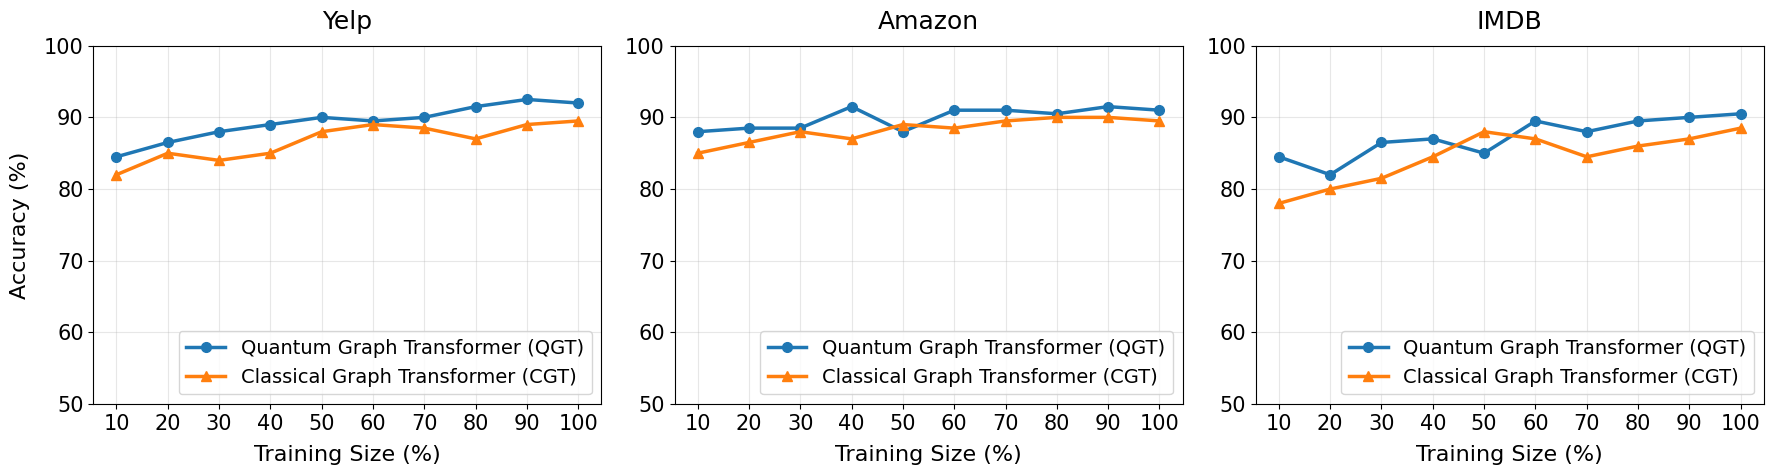

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# ==== Updated QGT results ====
qgt_yelp_results = {'10':84.50,'20':86.50,'30':88.0,'40':89.0,'50':90.0,'60':89.5,'70':90.0,'80':91.5,'90':92.5,'100':92.0}
qgt_imdb_results = {'10':84.50,'20':82.00,'30':86.5,'40':87.0,'50':85.0,'60':89.5,'70':88.0,'80':89.5,'90':90.0,'100':90.5}
qgt_amazon_results = {'10':88.00,'20':88.50,'30':88.5,'40':91.5,'50':88.0,'60':91.0,'70':91.0,'80':90.5,'90':91.5,'100':91.0}

# ==== Updated CGT results ====
cgt_yelp_results = {'10':82.0,'20':85.0,'30':84.0,'40':85.0,'50':88.0,'60':89.0,'70':88.5,'80':87.0,'90':89.0,'100':89.5}
cgt_imdb_results = {'10':78.0,'20':80.0,'30':81.5,'40':84.5,'50':88.0,'60':87.0,'70':84.5,'80':86.0,'90':87.0,'100':88.5}
cgt_amazon_results = {'10':85.0,'20':86.5,'30':88.0,'40':87.0,'50':89.0,'60':88.5,'70':89.5,'80':90.0,'90':90.0,'100':89.5}

def to_arrays(d):
    """dict of {'10': acc, ...} -> (perc array, acc array), sorted by percentage"""
    xs = sorted(int(k) for k in d.keys())
    ys = [float(d[str(k)]) for k in xs]
    return np.array(xs, dtype=float), np.array(ys, dtype=float)

datasets = [
    ("Yelp",   qgt_yelp_results,   cgt_yelp_results),
   
    ("Amazon", qgt_amazon_results, cgt_amazon_results),
     ("IMDB",   qgt_imdb_results,   cgt_imdb_results),
]

# ---- Font settings ----
plt.rcParams.update({
    "font.size": 15,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "legend.fontsize": 14,
})

# ---- Plot 1×3 ----
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, qgt_dict, cgt_dict) in zip(axes, datasets):
    xq, yq = to_arrays(qgt_dict)
    xc, yc = to_arrays(cgt_dict)
    
    ax.plot(xq, yq, marker="o", linewidth=2.5, markersize=7, 
            label="Quantum Graph Transformer (QGT)", color="#1f77b4")
    ax.plot(xc, yc, marker="^", linewidth=2.5, markersize=7, 
            label="Classical Graph Transformer (CGT)", color="#ff7f0e")
    
    ax.set_title(name, pad=12)
    ax.set_xlabel("Training Size (%)", labelpad=8)
    ax.set_xticks(xq)
    ax.grid(True, alpha=0.3)

axes[0].set_ylabel("Accuracy (%)", labelpad=10)

# Y-limits
for ax in axes:
    ax.set_ylim(50, 100)

# Unified legend
axes[0].legend(loc="lower right", frameon=True)
axes[1].legend(loc="lower right", frameon=True)
axes[2].legend(loc="lower right", frameon=True)

fig.tight_layout()
fig.savefig("sample_efficiency.pdf", dpi=300, bbox_inches="tight")
plt.show()